In [5]:
pip install pandas_datareader

Looking in indexes: https://pypi.python.org/simple, https://pypi.apple.com/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
#IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # supress scikit 'future warnings'
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib         
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import math
import pandas_datareader as pdr 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import norm, gmean, cauchy
import seaborn as sns
from datetime import datetime

%matplotlib inline

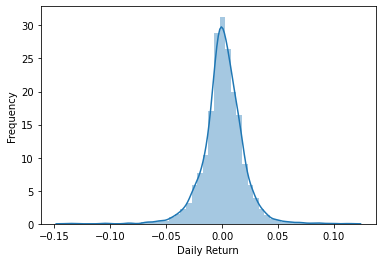

In [15]:
#ERROR CALCULATING FUNCTIONS

#TEMPLATE FUNCTION
def array_create(max_val):
    return_array = []
    interval = max_val/50
    return_array.append(interval)
    for c in range (1,25):
        return_array.append((return_array[c-1] + interval))
    return return_array

#ERROR PRINTER
def err_print(perc_diff, test_vals, y_predicted):
    print("Percent differences:")
    print(np.around(perc_diff.astype(float)))
    print("Actual values:")
    print(np.around(test_vals.astype(float)))
    print("Predicted Values:")
    print(np.around(y_predicted.astype(float)))
    
#HISTOGRAM PRINTER
def hist_print(perc_diff):
    plt.hist(perc_diff, bins = array_create(np.percentile(perc_diff, 95)))
    plt.title("Error Frequency Histogram (each value on x-axis should be multiplied by 100 to attain Error in %)")
    print("Error Frequency Chart:")
    plt.show()
def monteCarlo_data(data, months, iterations, return_type='log'):
    ft = drift_calc(data, return_type)
    if return_type == 'log':
        try:
            stv = log_returns(data).std().values
        except:
            stv = log_returns(data).std()
    elif return_type=='simple':
        try:
            stv = simple_returns(data).std().values
        except:
            stv = simple_returns(data).std()    

    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr
#MODEL ERROR CALCULATORS
def model_Error_Func(testing_set, test_vals, model, histogram = 0, error_report = 0, error_sort = 1, percent_change = 0):
    y_predicted = model.predict(testing_set)

    #ABSOLUTE ERROR ARRAY CREATION
    predic_diff = y_predicted - test_vals
    #abs_diff = np.absolute(predic_diff)
    perc_diff = np.absolute(predic_diff)
    perc_sum = perc_diff.sum()
    perc_inaccuracy = perc_sum/test_vals.size
    perc_accuracy = 1-(perc_inaccuracy)

    print("Average Error: " + str(perc_inaccuracy) + "%")
    
    if histogram == 1:
        hist_print(perc_diff)
    
    if error_report == 1:
        err_print(perc_diff, test_vals, y_predicted)
    
    if percent_change == 1:
        perc_change_array = np.array([])
        for i in range(0, len(perc_diff)):
            perc_change_actual = ((test_vals[i] - testing_set[i][(len(testing_set[i]) - 1)])/(testing_set[i][(len(testing_set[i]) - 1)]))*100
            perc_change_predicted = ((y_predicted[i] - testing_set[i][(len(testing_set[i]) - 1)])/(testing_set[i][(len(testing_set[i]) - 1)]))*100
            perc_change_array = np.append(perc_change_array, [perc_diff[i]*100, perc_change_predicted, perc_change_actual, y_predicted[i], test_vals[i]])
        
        perc_change_array = np.reshape(perc_change_array, (len(perc_diff),5))
        perc_change_array = perc_change_array[perc_change_array[:,1].argsort()]        
        print(perc_change_array[0:15])
        print("\n\n\n")
        print(perc_change_array[-15:])
        
    return perc_inaccuracy

def error_mean(testing_set, test_vals, model):
    y_predicted = model.predict(testing_set)
    
    #ABSOLUTE ERROR ARRAY CREATION
    predic_diff = y_predicted - test_vals
    #abs_diff = np.absolute(predic_diff)
    perc_diff = np.absolute(predic_diff)/100
    perc_square_sum = np.sum(perc_diff**50)
    
    print("Mean Squared Error: " + str(perc_square_sum))
    
    return perc_square_sum
    
def total_market_combo(data, mark_ticker = "^GSPC", start='2014-5-6'):
    market_data = import_stock_data(mark_ticker, start)
    market_rets = log_returns(market_data).dropna()
    ann_return = np.exp(market_rets.mean()*252).values-1
    data = data.merge(market_data, left_index=True, right_index=True)
    return data, ann_return

def validation_markovChain(test_vals, val, model):
    y_predicted = model.predict(testing_set)
    
    predic_diff = y_predicted - test_vals
    #abs_diff = np.absolute(predic_diff)
    perc_diff = np.absolute(predic_diff)
    
    num_within_val = np.sum(perc_diff <= val)
    perc_within_val = num_within_val/perc_diff.size
    
    print("Percent predicted with <" + str(val) + "% error: " + str(perc_within_val*100) + "%")
    
    return perc_within_val*100

def binary_model_error(testing_set, test_vals, model):
    y_predicted = model.predict(testing_set)
    perc_accuracy = (np.sum(y_predicted == test_vals)/y_predicted.size) * 100
    return perc_accuracy
def logathermic(data):
    return (np.log(1+data.pct_change()))
def money_calc(testing_set, test_vals, model, actual_perc):
    y_predicted = model.predict(testing_set)
    
    ProfitLoss = 10000
    
    #amount = ProfitLoss/5
    amount = 7500
    
    for i in range(0, len(y_predicted)):
        if ProfitLoss>=7500:
            amount = 7500
        else:
            amount = ProfitLoss*0.75
        
        if y_predicted[i] == 0:
            ProfitLoss += (-actual_perc[i])*(amount/100)
        if y_predicted[i] == 2:
            ProfitLoss += (actual_perc[i])*(amount/100)
    
    return ProfitLoss
def returning_simple(data):
    return ((data/data.shift(1))-1)
def total_calculation(testing_set, test_vals, model, actual_perc, graph = 0):
    y_predicted = model.predict(testing_set)
    
    ProfitLoss = 10000
    
    graphArrX = np.arange(0,len(testing_set)+1)
    graphArrY = np.array([10000])
    
    #amount = ProfitLoss/5
    amount = 7500
    
    for i in range(0, len(y_predicted)):
        if ProfitLoss>=7500:
            amount = 7500
        else:
            amount = ProfitLoss*0.75
        
        if y_predicted[i] == 0:
            ProfitLoss += (-actual_perc[i])*(amount/100)
        if y_predicted[i] == 2:
            ProfitLoss += (actual_perc[i])*(amount/100)
        if graph == 1:  
            graphArrY = np.append(graphArrY, ProfitLoss)
    
    
    if graph == 1:
        plt.plot(graphArrX, graphArrY, color ="green")
        plt.show()
    
    return ProfitLoss

def recent_money_calc_given_arr(testing_set, test_vals, model, actual_perc, choices_arr, graph = 0):
    y_predicted = choices_arr
    
    ProfitLoss = 10000
    
    graphArrX = np.arange(0,len(testing_set)+1)
    graphArrY = np.array([10000])
    
    #amount = ProfitLoss/5
    amount = 10000
    
    for i in range(0, len(y_predicted)):
        if ProfitLoss>=0:
            amount = ProfitLoss
        else:
            amount = ProfitLoss*0.75
        
        if y_predicted[i] == 0:
            ProfitLoss += (-actual_perc[i])*(amount/100)
        if y_predicted[i] == 2:
            ProfitLoss += (actual_perc[i])*(amount/100)
        if graph == 1:  
            graphArrY = np.append(graphArrY, ProfitLoss)
    
    
    if graph == 1:
        plt.plot(graphArrX, graphArrY, color ="green")
        plt.show()
    
    return ProfitLoss

def changing_test(testing_set, test_vals, model):
    y_predicted = model.predict(testing_set)
    
    count = 0
    
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == 0:
            count += 1
        if y_predicted[i] == 2:
            count += 1
    
    #print(count)
    #print(y_predicted.size)
    #print(count/y_predicted.size)
    
    return (count/y_predicted.size)*100
date_time = '2012-5-6'
def stocks_data (start = date_time, end = datetime.today().strftime('%Y-%m-%d')):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

def acc_on_chances(testing_set, test_vals, model, actual_perc):
    y_predicted = model.predict(testing_set)
    
    count = 0
    
    correct = 0
    
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == 0:
            count += 1
            if actual_perc[i] < 0:
                correct += 1
        if y_predicted[i] == 2:
            count += 1
            if actual_perc[i] > 0:
                correct += 1
            
    if count == 0:
        return count
    else:
        return (correct/count)*100
datas = data.pct_change()
datas+= 1
log_returns = np.log(datas)
sns.distplot(log_returns.iloc[1:])
s = "Daily Return"
f = "Frequency"
plt.xlabel(s)
plt.ylabel(f)
def simulation_markovChain(data, days, iterations, return_type='log', plot=True):
    returns = daily_returns(data, days, iterations, return_type)
    price_list = np.zeros_like(returns)
    price_list[0] = data.iloc[-1]
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
    return pd.DataFrame(price_list)

simulation_model(data, 252, 1000, 'log')
def acc_on_chances_given_arr(testing_set, test_vals, model, actual_perc, give_arr):
    y_predicted = give_arr
    count = 0
    
    correct = 0
    
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == 0:
            count += 1
            if actual_perc[i] < 0:
                correct += 1
        if y_predicted[i] == 2:
            count += 1
            if actual_perc[i] > 0:
                correct += 1
            
    if count == 0:
        return count
    else:
        return (correct/count)*100

def finding_MonteCarloValue(predicted, highers, totalval = None, on = 'value'):
    if ticker == None:
        if on == 'return':
            predicted0 = predicted.iloc[0,0]
            predicted = predicted.iloc[-1]
            over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
            less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
            predList = list(predicted)
        elif on == 'value':
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [i for i in predList if i >= higherthan]
            less = [i for i in predList if i < higherthan]
        else:
            print("'on' must be either value or return")
    else:
        if on == 'return':
            predicted = predicted[predicted['ticker'] == ticker]
            predicted0 = predicted.iloc[0,0]
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
            less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
        elif on == 'value':
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [i for i in predList if i >= higherthan]
            less = [i for i in predList if i < higherthan]
        else:
            print("'on' must be either value or return")        
    return (len(over)/(len(over)+len(less)))
    

def predictions_to_arr(testing_set, model):
    y_predicted = model.predict(testing_set)
    
    return y_predicted
def simulate_montecarlo(data, mark_ticker = "^GSPC", riskfree = 0.025):
    dd, mark_ret = market_data_combination(data, mark_ticker, start)
    log_ret = log_returns(dd)
    covar = log_ret.cov()*252
    covar = pd.DataFrame(covar.iloc[:-1,-1])
    mrk_var = log_ret.iloc[:,-1].var()*252
    beta = covar/mrk_var
    
    stdev_ret = pd.DataFrame(((log_ret.std()*250**0.5)[:-1]), columns=['STD'])
    beta = beta.merge(stdev_ret, left_index=True, right_index=True)
    for i, row in beta.iterrows():
        beta.at[i,'CAPM'] = riskfree + (row[mark_ticker] * (mark_ret-riskfree))
    for i, row in beta.iterrows():
        beta.at[i,'Sharpe'] = ((row['CAPM']-riskfree)/(row['STD']))
    beta.rename(columns={"^GSPC":"Beta"}, inplace=True)
    
    return beta
def drift_calc(data, return_type='log'):
    if return_type=='log':
        lr = log_returns(data)
    elif return_type=='simple':
        lr = simple_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift
   

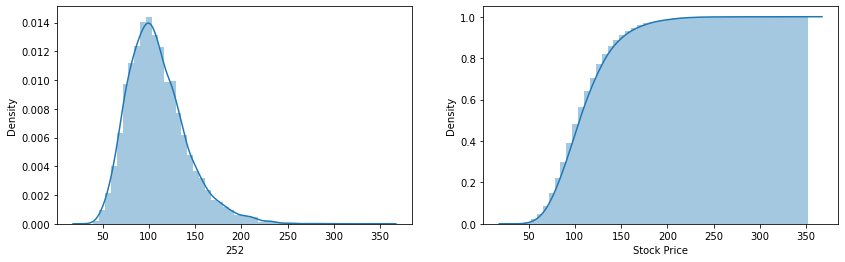

GOOG
Days: 252
Expected Value: $109.34
Return: 14.88%
Probability of Breakeven: 0.6667
Beta: 1.12
Sharpe: 0.24
CAPM Return: 9.23%


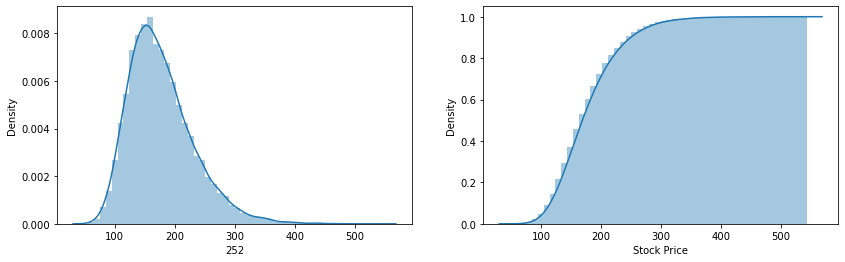

AAPL
Days: 252
Expected Value: $176.92
Return: 19.65%
Probability of Breakeven: 0.7199
Beta: 1.2
Sharpe: 0.24
CAPM Return: 9.74%
